<a href="https://github.com/madrid42-ia/taller01-mnist/blob/main/Intro_IA.ipynb" target=\_parent\><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> 

# Taller 1 - Reconocimiento de digitios

## Objetivos de este taller
- Aprender lo que es un modelo de Machine Learning (ML)
- Entender que es un problema de optimización y como se resuelve
- Construir un modelo básico para el reconocimiento de digitios

## Contenidos:
* [Modelos de Machine Learning](#modelos)
* [Problemas de optimización](#optimizacion)
* [Redes neuronales](#nn)
* [PoC: Reconocimiento de digitos](#mnist)

## Modelo de Machine Learning <a class="anchor" id="modelos"></a>
Un modelo de machine learning es un algoritmo que resuleve un problema especifico igual que los algoritmos tradicionales, pero que a diferencia de estos el modelo es generado automaticamente. La generacion de estos algoritmos es lo que hoy en dia denominamos Aprendizaje Automatico o Machine Learning.

Hoy en día gracias a la gran cantidad de datos de los que disponemos la mayoría de estos algoritmos van "aprendiendo" usando grandes datasets de los que extraen representaciones y patrones.

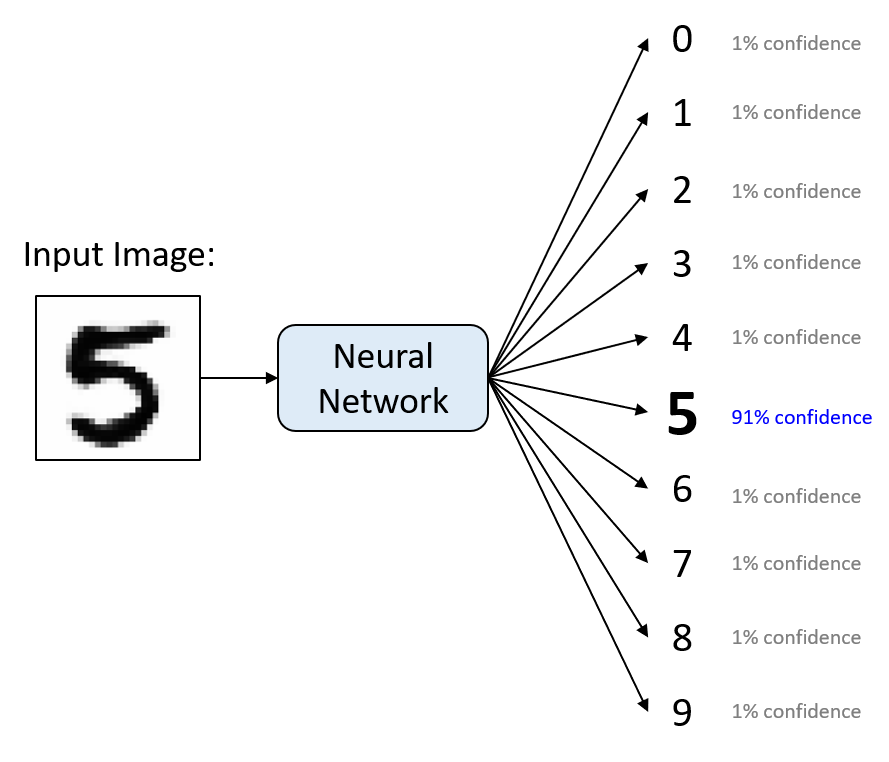

## Problemas de optimización <a class="anchor" id="optimizacion"></a>

Para entender como generamos estos modelos es necesario primero saber lo que es un problema de optimización y como se resulve.

En un problema de optimización tu tienes una función f(x) y quieres hayar el punto (x) donde la función adquiera su minimo valor. Es decir, si vemos la función graficamente queremos ir descendiendo el terreno hasta llegar a un valle.

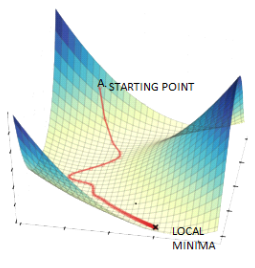


Por ejemplo, lo que queremos hacer en ML es minimizar el error de nuestro modelo con respecto a aquello que queramos conseguir.

En el caso que nos atañe en este taller, el reconocimiento de digitos, queremos hacer un modelo dada una imagen donde se lea un 5 nos devuelva el valor 5. Para esto le introducimos imagenes anotadas con el valor correcto y vamos modificando los pesos del modelo de forma que se reduzca el error entre el valor correcto anotado y el valor que nos devuelva nuestro modelo.

El objetivo de esto es que el modelo acabe aprendiendo a diferenciar imagenes fuera de nuestro conjunto de datos original, a esto le llamamos generalizar.

## Redes neuronales <a class="anchor" id="nn"></a>

Las redes neuronales son el tipo de modelo de aprendizaje más común a día de hoy. Y por tanto en el que nos centraremos en el resto de taller.

Empezemos por el concepto de neurona.

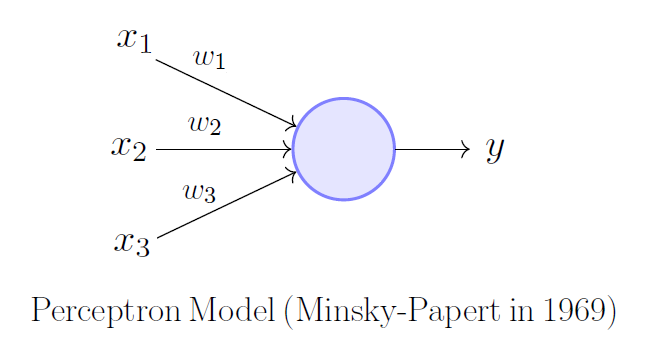

Cada neurona coje un determinado input, lo multiplica por sus pesos internos (que son los parametros que se van modificando a lo largo del entrenamiento) y tras sumarlos aplica una función no lineal (llamada función de activación) y produce un ouput.

De forma más rigurosa, cada neurona coje un vector de $n$-elementos $x$ y lo multiplica el vector de pesos $w$ para, por último aplicar la no linearidad.

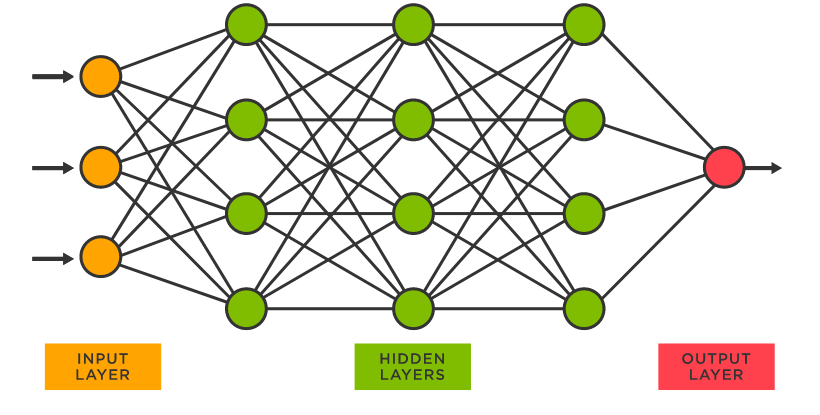


Para conseguir la red completa lo que hacemos en encadenar los inputos de varias neuronas con los outputs de las anteriores. Hasta conseguir un modelo más ancho (neuronas por capa) y más profundo (número de capas).

Por ejemplo, en la imagen anterior tenemos 3 capas con cuatro neuronas cada una. Las capas de input y output suelen distinguirse de las otras ya que no van conectadas completamente. En el caso de las imagenes el input de la red serían los pixeles de la imagen y el output el valor del número.

## PoC: Reconocimiento de digitos <a class="anchor" id="mnist"></a>

A continuación vamos a hacer una prueba de concepto de una red neuronal entrenada para reconocer digitos usando la liberia pytorch.

Los pasos a realizar para construir este tipo de modelos son:
1. Descargamos el dataset (conjunto de todos nuestros datos).
2. Definimos el modelo (número de neronas, capas, etc).
3. Definimos una función de perdida (loss function) que va a decirle a nuestro modelo como de bien lo ha hecho.
4. Definimos una función de optimización que va actualizando los pesos de la red.
5. Entrenamos al modelo usando todo lo anterior.

### 1. Descargamos el dataset (conjunto de todos nuestros datos)

In [1]:
# Importamos pytorch
import torch
# Importamos el dataset
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

import numpy as np

# Esta libreria la usaremos para enseñar las imagenes para conseguir un efecto mas visual, pero no es necesaria
from matplotlib import pyplot as plt

dataset = MNIST(
    root='./downloads',
    train=True,
    download=True,
    transform=ToTensor() # Esta linea convierte la imagen del digito a una matriz de varias dimensiones (tensor)
)

The length of the dataset is 60000
The shape of the image matrix is torch.Size([1, 28, 28])
The i-image label is 4
The i-image is:


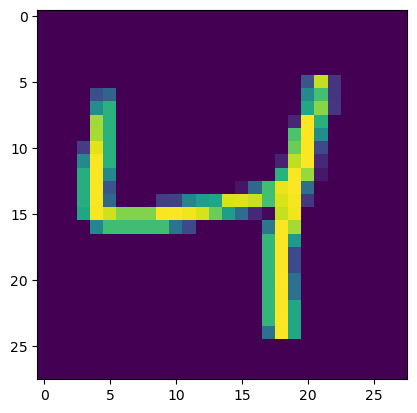

In [2]:
def showimg(img):
    """
    Function to plot de image from matrix form to pixel representation
    """
    img = img.movedim((1, 2, 0), (0, 1, 2))
    plt.imshow(img)


# Podemos ver que nuestro dataset esta conformado una lista de 60_000 pares (imagen, label).
# Denominamos label al numero correcto que queremos distinguir

print(f'The length of the dataset is {len(dataset)}')
i = 2
print(f'The shape of the image matrix is {dataset[i][0].shape}')
print(f'The i-image label is {dataset[i][1]}')
print('The i-image is:')
showimg(dataset[i][0])

### 2. Definimos nuestra red neuronal BobNet
Esta contará con 3 capas de neuronas (profundidad = 3), que en pytorch se llaman lineales por ser una función lineal como vimos anteriormente. La capa de input se compone de 28\*28 datos (1 por px), la primera y sgunda capa de neronas tiene 512 de estas (un número relativamente alto para dar capacidad a la red), y la capa de output tendrá 10, una por posible predicción (numeros del 1 al 10).

Cada capa esta seguida de una función de activación no lineal como explicamos antes. En este caso usamos la función $ReLU(x) = max(0, x)$ que aplana el input a cero para valores negativos ya que es conocida su eficiencia en estos problemas.

En la capa de output usamos una funcion diferente (llamada softmax) que convierte el output en probabilidades para tener un nivel de confianza para cada posible predicción (números del 0 al 9).

In [3]:
class BobNet(torch.nn.Module):
    def __init__(self):
        super(BobNet, self).__init__()
        self.layer1 = torch.nn.Linear(28*28, 50)
        self.layer2 = torch.nn.Linear(50, 50)
        self.layer3 = torch.nn.Linear(50, 10)
        self.activation = torch.nn.ReLU()
        self.to_prob = torch.nn.Softmax(dim=1)
        self.flatten = torch.nn.Flatten()

    def forward(self, x):
        x = self.flatten(x) # Flatten the input from 28, 28 to 784 (28 * 28)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.to_prob(self.layer3(x))
        return x
        
model = BobNet()
model

BobNet(
  (layer1): Linear(in_features=784, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=10, bias=True)
  (activation): ReLU()
  (to_prob): Softmax(dim=1)
  (flatten): Flatten(start_dim=1, end_dim=-1)
)

### 3. Definimos la función de perdida (loss function)

Esta función como hemos dicho antes, es la encargada de cualificar como de bien funciona nuestro modelo para poder convertir el entrenamiento en un problema de optimización y así poder usar herramientas matemáticas para resolverlo.

En este caso usamos la función de entropia cruzada que nos da el propio pytorch ya que funciona muy bien en problemas de clasificación como el nuestro.

In [4]:
loss_fn = torch.nn.CrossEntropyLoss()

### 4. Definimos la función optimizadora
Esta función irá actualizando los pesos del modelo para que este aprenda en base a la función de perdida. Para esto le debemos de pasar los parametros del modelo (pesos). Al definir esta función debemos de indicar los llamados hyperparameters, los cuales en vez de ser seleccionamos automáticamente (como los parametros normales) son editados a mano por nosotros. En este caso el único hyperparameter que tocaremos es el learning rate (lr) que determinada como de rápido modificamos los pesos. 

In [5]:
optim = torch.optim.SGD(model.parameters(), lr=1e-3)

In [6]:
from tqdm import tqdm

BATCH_SIZE = 64
for step in range(200001):
    # first we sample N=batch_size images to train our model on them
    idx = torch.randint(len(dataset), size=(BATCH_SIZE,))
    x, y = dataset.data[idx], dataset.targets[idx] # x is the img and y is the label

    x = x / 255 # map pixel values from (int)[0..255] to (float)[0..1]

    prediction = model(x) # predict
    y_hat = torch.argmax(prediction, dim=1) # turn prob prediction to specific number

    acc = (len(y) - len((y_hat - y).nonzero())) / BATCH_SIZE # calculate accuracy

    loss = loss_fn(prediction, y)
    # We reset and propagate the loss backward through the net
    model.zero_grad()
    loss.backward()

    # We apply the optimazer
    optim.step()

    if step % 10000 == 0:
        print(f'Step {step} Loss={loss.item(): .4f} Acc={acc: .4f}')

Step 0 Loss= 2.3017 Acc= 0.2031
Step 10000 Loss= 2.3023 Acc= 0.1562
Step 20000 Loss= 2.2941 Acc= 0.2812
Step 30000 Loss= 2.2734 Acc= 0.4219
Step 40000 Loss= 2.1852 Acc= 0.3281
Step 50000 Loss= 1.9779 Acc= 0.5469
Step 60000 Loss= 1.9379 Acc= 0.5469
Step 70000 Loss= 1.8721 Acc= 0.6250
Step 80000 Loss= 1.8563 Acc= 0.6094
Step 90000 Loss= 1.8080 Acc= 0.7031
Step 100000 Loss= 1.7569 Acc= 0.7344
Step 110000 Loss= 1.6821 Acc= 0.8125
Step 120000 Loss= 1.7537 Acc= 0.7031
Step 130000 Loss= 1.7443 Acc= 0.7188
Step 140000 Loss= 1.7911 Acc= 0.6719
Step 150000 Loss= 1.7015 Acc= 0.7500
Step 160000 Loss= 1.6546 Acc= 0.8281
Step 170000 Loss= 1.7062 Acc= 0.7656
Step 180000 Loss= 1.6458 Acc= 0.8438
Step 190000 Loss= 1.5553 Acc= 0.9219
Step 200000 Loss= 1.5894 Acc= 0.9062


## Ejercicio
Prueba a usar la funcion model(x) para predecir el digito de una de las imagenes de nuestro dataset y comprueba si coincide con el label.

In [7]:
# Escribe tu codigo aqui